$$ Question \quad 1$$

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [56]:
# Parameters
mu1, mu2 = 1, 4
sigma1, sigma2 = 3, 2
rho = 0.5

In [57]:
# Create grid of points
x = np.linspace(mu1 - 4*sigma1, mu1 + 4*sigma1, 100)
y = np.linspace(mu2 - 4*sigma2, mu2 + 4*sigma2, 100)
X, Y = np.meshgrid(x, y)

In [58]:
# Create covariance matrix
cov = [[sigma1**2, rho*sigma1*sigma2],
       [rho*sigma1*sigma2, sigma2**2]]
mean = [mu1, mu2]

In [59]:
# Calculate the 2D normal distribution
rv = multivariate_normal(mean, cov)
Z = rv.pdf(np.dstack([X, Y]))


In [60]:
fig = plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Y')

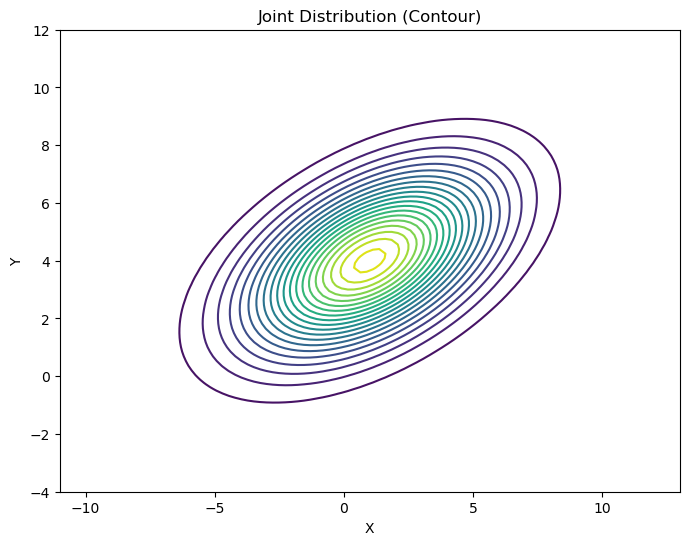

In [62]:
# 1. Joint distribution as contour plot
fig,ax1 = plt.subplots(figsize=(8, 6))
ax1.contour(X, Y, Z, levels=20)
ax1.set_title('Joint Distribution (Contour)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

Text(0.5, 0, 'Density')

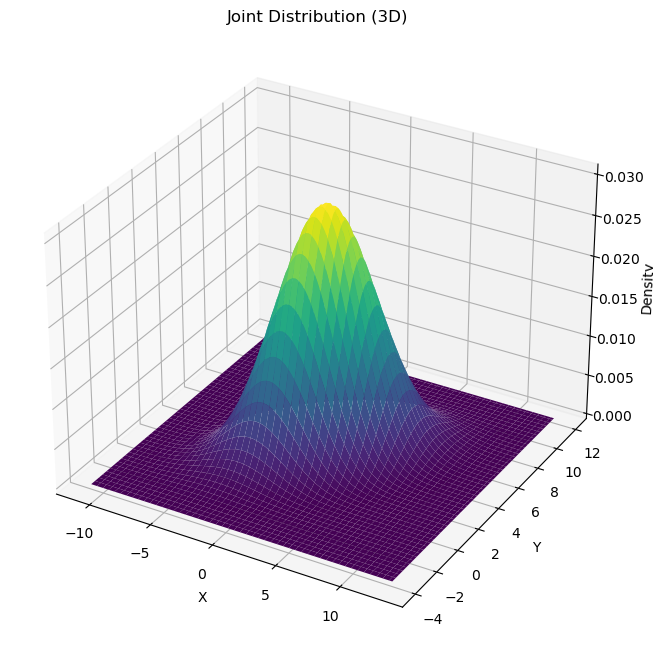

In [69]:
# 2. Joint distribution as 3D surface
fig = plt.figure(figsize=(10, 8))
ax2 = fig.add_subplot(111, projection='3d')  # This is crucial for 3D

# Create the surface plot
surf = ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_title('Joint Distribution (3D)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Density')


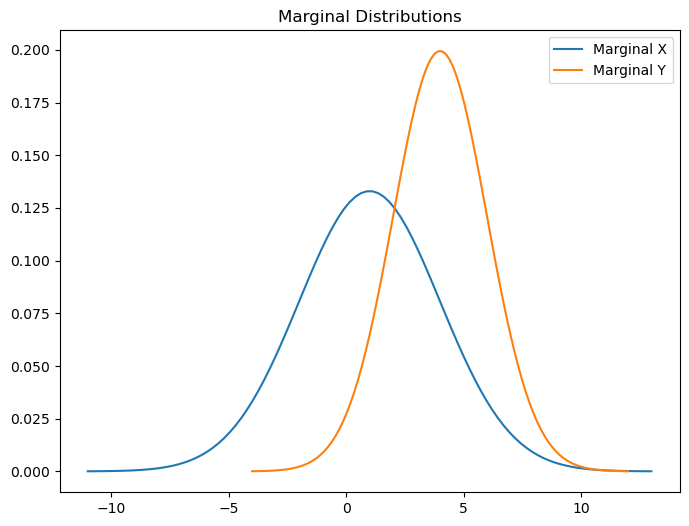

In [66]:
# 3. Marginal distributions
fig, ax3 = plt.subplots(figsize=(8, 6))
# Marginal of X
marginal_x = np.sum(Z, axis=0) * (y[1] - y[0])  # Approximate integration
ax3.plot(x, marginal_x, label='Marginal X')
# Marginal of Y
marginal_y = np.sum(Z, axis=1) * (x[1] - x[0])  # Approximate integration
ax3.plot(y, marginal_y, label='Marginal Y')
ax3.set_title('Marginal Distributions')
ax3.legend()

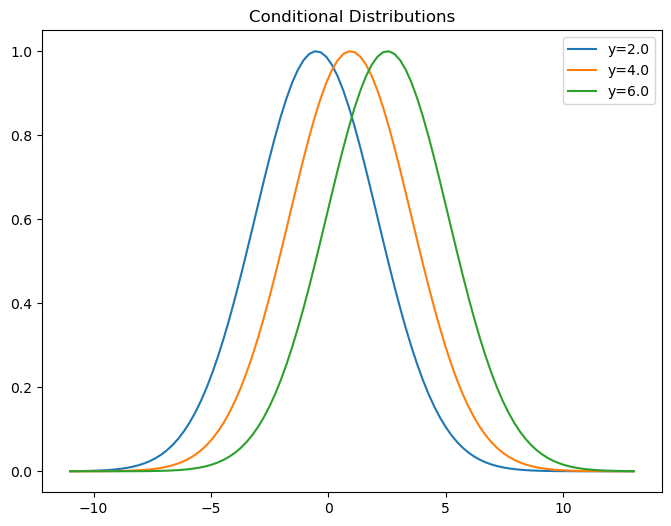

In [68]:
# 4. Conditional distributions at different slices
fig,ax4 = plt.subplots(figsize=(8, 6))
# Plot conditional distributions at different y values
y_slices = [mu2 - sigma2, mu2, mu2 + sigma2]
for y_val in y_slices:
    idx = np.abs(y - y_val).argmin()
    conditional = Z[idx, :] / np.max(Z[idx, :])  # Normalize for visualization
    ax4.plot(x, conditional, label=f'y={y_val:.1f}')
ax4.set_title('Conditional Distributions')
ax4.legend()

For 3D Gaussian, we could either take slice, or use projections? e.g. marginal distribution?

$$ Question \quad 2$$

$$ \begin{aligned}
&\int^{\infty}_0 x\lambda e^{-\lambda x} dx
&=\int^{\infty}_0 e^{-\lambda x} dx
&=\frac{1}{\lambda}
\end{aligned}$$

$$ \begin{aligned}
&\int^{\infty}_0 x^2\lambda e^{-\lambda x} dx
&=\int^{\infty}_0 2x e^{-\lambda x} dx
&=\int^{\infty}_0 \frac{2}{\lambda} e^{-\lambda x} dx\\
&=\frac{2}{\lambda^2}
\end{aligned}$$

$$ \begin{aligned}
V(X)&=\frac{2}{\lambda^2}-\frac{1}{\lambda^2}\\
&=\frac{1}{\lambda^2}
\end{aligned}$$ 

$$ Quetsion \quad 3$$